# Analise de Texto
----

**Importando Biliotecas**


In [0]:
import requests
import string

**Importando Texto para tratamento**
- Utilizamos o site http://www.gutenberg.org para obtermos um texto 


In [0]:
resposta = requests.get('http://www.gutenberg.org/files/16429/16429-0.txt')

**Ajustando o encoding do Texto importado**

In [0]:
resposta.encoding = 'utf-8'

**Colocando todo o Texto em maiusculo**

In [0]:
texto = resposta.text.upper()

**Elimina texto inicial e final deixando apenas os contos**

In [0]:
texto = texto[texto.index('*A MÃE*') : texto.index('FIM.') -1]

**Removendo Pantuação do Texto**

In [0]:
texto = texto.translate(str.maketrans('', '', string.punctuation))
texto = texto.translate(str.maketrans('', '', '«»'))

**Retirando caracteres acentuados do texto**

In [9]:
!pip install unidecode
from unidecode import unidecode
texto = unidecode(texto)


**Separando texto em Palavras**

In [0]:
arrTexto = texto.split()

**Removendo StopWords**

In [0]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopWordPort = set(stopwords.words('portuguese'))
[palavra for palavra in arrTexto if palavra.lower() not in stopWordPort]
palavras_sem_stopwords = [palavra for palavra in arrTexto if palavra.lower() not in stopWordPort]
print(palavras_sem_stopwords)

**Gerando Frequencia das Palavras no Texto**

In [73]:
dic = {}

for x in palavras_sem_stopwords:
  if x in dic:
    dic[x] += 1
  else:
    dic[x] = 1
print(dic)


{'MÃE': 59, 'AFFLICTA': 1, 'SENTADA': 8, 'PÉ': 17, 'BERÇO': 2, 'FILHO': 35, 'MEDO': 10, 'MORRESSE': 1, 'CREANCINHA': 1, 'PALLIDA': 3, 'OLHOS': 28, 'FECHADOS': 1, 'RESPÍRAVA': 1, 'DIFFICULDADE': 2, 'ÁS': 22, 'VEZES': 21, 'TÃO': 71, 'PROFUNDAMENTE': 3, 'PARECIA': 10, 'GEMER': 1, 'CAUSAVA': 2, 'AINDA': 55, 'LASTIMA': 1, 'PEQUENINO': 10, 'MORIBUNDO': 2, 'NISTO': 10, 'BATERAM': 1, 'Á': 134, 'PORTA': 37, 'ENTROU': 16, 'POBRE': 67, 'HOMEM': 44, 'VELHO': 27, 'EMBUÇADO': 1, 'MANTA': 2, 'DARRIEIRO': 1, 'INVERNO': 6, 'LÁ': 37, 'FÓRA': 8, 'TUDO': 49, 'COBERTO': 4, 'NEVE': 13, 'GÊLO': 1, 'VENTO': 10, 'CORTAVA': 1, 'NAVALHA': 1, 'TREMIA': 3, 'FRIO': 12, 'CREANÇA': 23, 'ADORMECÊRA': 1, 'ALGUNS': 5, 'INSTANTES': 3, 'LEVANTOUSE': 3, 'PÔR': 6, 'LUME': 5, 'CANECA': 1, 'CERVEJA': 2, 'COMEÇOU': 18, 'EMBALAR': 1, 'PEGANDO': 1, 'CADEIRA': 1, 'SENTOUSE': 2, 'LADO': 9, 'DELLE': 19, 'CONTEMPLANDO': 1, 'FILHINHO': 1, 'DOENTE': 13, 'RESPIRAVA': 1, 'CADA': 26, 'VEZ': 60, 'PEGOULHE': 1, 'MÃOSINHA': 1, 'DESCARNADA':

**Transformando o Dicionario emum DataFrame e Ordenando por Frequencia Decrescente**

In [0]:
import pandas as pd
dfpalavras = pd.DataFrame(dic.items(), columns=['Palavra', 'Frequencia'])
dfpalavras = dfpalavras.sort_values(by='Frequencia', ascending=False) 
print(dfpalavras)


# Nuvem de Palavras

In [0]:
!pip install wordcloud
!pip install matplotlib

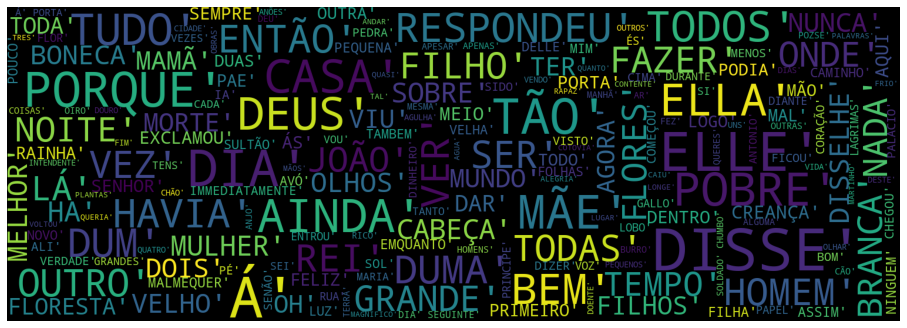

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(str(palavras_sem_stopwords))

plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()